In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://rawgit.com/Qaqi/cs210project/master/ign_new.csv',sep=';' ,index_col=['gameid'])
data.head(3)

,score_phrase,score_phrase_enum,title,score,genre,genre_enum,editors_choice,release_year,release_month
gameid,,,,,,,,,
0,Amazing,9,LittleBigPlanet PS Vita,9.0,Platformer,1,Y,2012,9
3,Great,8,NHL 13,8.5,Sports,2,N,2012,9
7,Amazing,9,Guild Wars 2,9.0,RPG,3,Y,2012,9


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

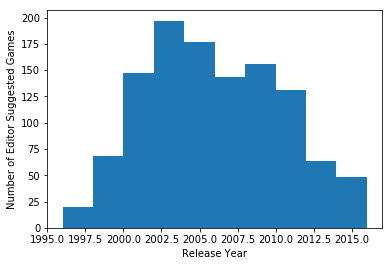

In [4]:
d = data.dropna()
plt.hist(d[d.editors_choice=='Y'].release_year)
plt.xlabel('Release Year')
plt.ylabel('Number of Editor Suggested Games');

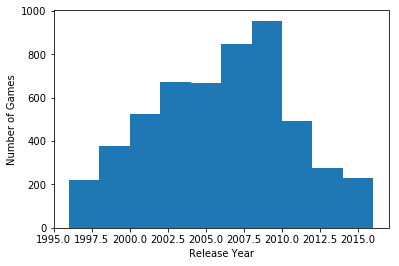

In [5]:
d = data.dropna()
plt.hist(d.release_year)
plt.xlabel('Release Year')
plt.ylabel('Number of Games');

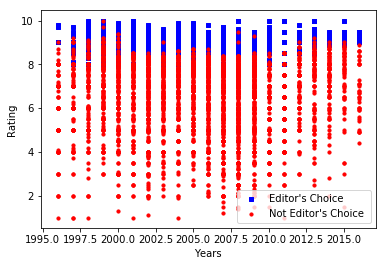

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(d[d.editors_choice=='Y'].release_year, d[d.editors_choice=='Y'].score, s=10, c='b', marker="s", label='Editor\'s Choice')
ax1.scatter(d[d.editors_choice=='N'].release_year, d[d.editors_choice=='N'].score, s=10, c='r', marker="o", label='Not Editor\'s Choice ')
ax1.set_xlabel('Years')
ax1.set_ylabel('Rating')
plt.legend(loc='lower right');
plt.show()